In [1]:
import os, glob, time, datetime
import numpy as np
from PIL import Image

import torch
import torch.nn as nn
from torchvision.utils import save_image

from common.dataset import TrainDataProvider
from common.function import init_embedding
from common.models import Encoder, Decoder, Discriminator, Generator
from common.utils import denorm_image

## Fine Tune
30epoch까지 학습된 모델에서부터 120epoch 더 학습
- 다른점 : L1 penalty 500, Lconst penalty 1000 으로 변경해서 학습시키기

In [2]:
from common.train import train

unpickled total 74748 examples
unpickled total 151911 examples
train examples -> 74748, val examples -> 151911
total batches: 4672


- 약 14분/1epoch : 2시간20분/10epoch


- 9시간20분/40epoch

### `lr=0.001` 31~70epoch

In [10]:
save_path = './fixed_fake/'
to_model_path = './model_checkpoint/'
from_model_path = './model_checkpoint/'
restore = ['30-0531-20:51-Encoder.pkl', '30-0531-20:51-Decoder.pkl', '30-0531-20:51-Discriminator.pkl']
losses = train(max_epoch=40, schedule=100, data_dir=data_dir, save_path=save_path, from_model_path=from_model_path,\
               to_model_path=to_model_path, restore=restore, log_step=500, sample_step=500, fine_tune=True)

30 epoch trained model has restored
05:04:37 Epoch [31/70], step [500/4672], l1_loss: 84.4759, d_loss: 0.0141, g_loss: 98.2288
05:06:08 Epoch [31/70], step [1000/4672], l1_loss: 80.9535, d_loss: 0.0097, g_loss: 93.1586
05:07:39 Epoch [31/70], step [1500/4672], l1_loss: 76.9312, d_loss: 2.3263, g_loss: 88.5707
05:09:11 Epoch [31/70], step [2000/4672], l1_loss: 79.0927, d_loss: 0.0182, g_loss: 88.4477
05:10:42 Epoch [31/70], step [2500/4672], l1_loss: 85.6488, d_loss: 0.0650, g_loss: 91.0437
05:12:14 Epoch [31/70], step [3000/4672], l1_loss: 77.9031, d_loss: 0.0144, g_loss: 86.6069
05:13:45 Epoch [31/70], step [3500/4672], l1_loss: 90.0524, d_loss: 0.0126, g_loss: 98.1497
05:15:16 Epoch [31/70], step [4000/4672], l1_loss: 77.3033, d_loss: 0.0105, g_loss: 86.3473
05:16:47 Epoch [31/70], step [4500/4672], l1_loss: 67.7665, d_loss: 0.0008, g_loss: 78.2562
05:18:50 Epoch [32/70], step [500/4672], l1_loss: 73.6870, d_loss: 0.0161, g_loss: 82.0734
05:20:22 Epoch [32/70], step [1000/4672], l1_l

07:24:35 Epoch [40/70], step [4500/4672], l1_loss: 55.2795, d_loss: 0.0026, g_loss: 66.6242
07:26:37 Epoch [41/70], step [500/4672], l1_loss: 70.4729, d_loss: 1.2244, g_loss: 71.2923
07:28:08 Epoch [41/70], step [1000/4672], l1_loss: 73.1726, d_loss: 0.0060, g_loss: 79.6500
07:29:39 Epoch [41/70], step [1500/4672], l1_loss: 64.8958, d_loss: 0.0022, g_loss: 73.3389
07:31:10 Epoch [41/70], step [2000/4672], l1_loss: 65.6405, d_loss: 0.0124, g_loss: 72.6511
07:32:41 Epoch [41/70], step [2500/4672], l1_loss: 62.8006, d_loss: 0.0236, g_loss: 69.5347
07:34:12 Epoch [41/70], step [3000/4672], l1_loss: 65.5347, d_loss: 0.8318, g_loss: 66.6592
07:35:44 Epoch [41/70], step [3500/4672], l1_loss: 70.7307, d_loss: 0.0359, g_loss: 79.4717
07:37:15 Epoch [41/70], step [4000/4672], l1_loss: 67.2488, d_loss: 0.0097, g_loss: 79.2785
07:38:46 Epoch [41/70], step [4500/4672], l1_loss: 71.2590, d_loss: 0.0280, g_loss: 82.5722
07:40:48 Epoch [42/70], step [500/4672], l1_loss: 51.3034, d_loss: 0.0006, g_loss

09:46:23 Epoch [50/70], step [4500/4672], l1_loss: 53.1567, d_loss: 0.0083, g_loss: 60.9409
09:48:26 Epoch [51/70], step [500/4672], l1_loss: 56.6326, d_loss: 0.0671, g_loss: 60.7939
09:49:57 Epoch [51/70], step [1000/4672], l1_loss: 50.4803, d_loss: 0.0242, g_loss: 55.9763
09:51:28 Epoch [51/70], step [1500/4672], l1_loss: 55.6218, d_loss: 0.0024, g_loss: 63.5348
09:52:59 Epoch [51/70], step [2000/4672], l1_loss: 58.1566, d_loss: 0.0353, g_loss: 64.6321
09:54:30 Epoch [51/70], step [2500/4672], l1_loss: 62.6807, d_loss: 0.0460, g_loss: 66.7849
09:56:01 Epoch [51/70], step [3000/4672], l1_loss: 50.1426, d_loss: 0.2096, g_loss: 52.4237
09:57:32 Epoch [51/70], step [3500/4672], l1_loss: 54.7243, d_loss: 0.0018, g_loss: 63.7696
09:59:03 Epoch [51/70], step [4000/4672], l1_loss: 71.9954, d_loss: 0.0207, g_loss: 80.1666
10:00:34 Epoch [51/70], step [4500/4672], l1_loss: 59.1759, d_loss: 0.0008, g_loss: 68.1989
10:02:37 Epoch [52/70], step [500/4672], l1_loss: 55.5835, d_loss: 0.0088, g_loss

12:08:14 Epoch [60/70], step [4500/4672], l1_loss: 54.8844, d_loss: 0.0023, g_loss: 62.0720
12:10:17 Epoch [61/70], step [500/4672], l1_loss: 57.1707, d_loss: 0.0179, g_loss: 66.7072
12:11:48 Epoch [61/70], step [1000/4672], l1_loss: 58.8840, d_loss: 0.0019, g_loss: 69.2693
12:13:19 Epoch [61/70], step [1500/4672], l1_loss: 64.7285, d_loss: 0.0027, g_loss: 76.2496
12:14:50 Epoch [61/70], step [2000/4672], l1_loss: 60.3799, d_loss: 0.0072, g_loss: 68.0691
12:16:21 Epoch [61/70], step [2500/4672], l1_loss: 49.6584, d_loss: 0.0123, g_loss: 55.4634
12:17:52 Epoch [61/70], step [3000/4672], l1_loss: 61.9161, d_loss: 0.0167, g_loss: 69.7777
12:19:24 Epoch [61/70], step [3500/4672], l1_loss: 50.4726, d_loss: 0.0170, g_loss: 57.2729
12:20:55 Epoch [61/70], step [4000/4672], l1_loss: 56.1230, d_loss: 0.0093, g_loss: 62.9039
12:22:26 Epoch [61/70], step [4500/4672], l1_loss: 53.6442, d_loss: 0.0013, g_loss: 65.2022
12:24:28 Epoch [62/70], step [500/4672], l1_loss: 58.3175, d_loss: 0.0016, g_loss

14:30:05 Epoch [70/70], step [4500/4672], l1_loss: 54.8805, d_loss: 0.0065, g_loss: 65.4498


### `lr=0.0005` 71~110epoch

In [10]:
save_path = './fixed_fake/'
to_model_path = './model_checkpoint/'
from_model_path = './model_checkpoint/'
restore = ['70-0601-14:30-Encoder.pkl', '70-0601-14:30-Decoder.pkl', '70-0601-14:30-Discriminator.pkl']
losses = train(max_epoch=40, schedule=100, data_dir=data_dir, save_path=save_path, \
               from_model_path=from_model_path, to_model_path=to_model_path, restore=restore, \
               log_step=500, sample_step=2000, fine_tune=True, lr=0.0005)

70 epoch trained model has restored
15:39:42 Epoch [71/110], step [500/4672], l1_loss: 54.3120, d_loss: 0.0239, g_loss: 67.2261
15:41:13 Epoch [71/110], step [1000/4672], l1_loss: 62.6762, d_loss: 0.0018, g_loss: 72.9440
15:42:44 Epoch [71/110], step [1500/4672], l1_loss: 51.3882, d_loss: 0.0055, g_loss: 62.3220
15:44:15 Epoch [71/110], step [2000/4672], l1_loss: 52.9934, d_loss: 0.0090, g_loss: 65.5396
15:45:47 Epoch [71/110], step [2500/4672], l1_loss: 53.3602, d_loss: 0.0059, g_loss: 60.6123
15:47:18 Epoch [71/110], step [3000/4672], l1_loss: 54.4637, d_loss: 0.1301, g_loss: 68.4441
15:48:49 Epoch [71/110], step [3500/4672], l1_loss: 52.6051, d_loss: 0.0047, g_loss: 62.0371
15:50:20 Epoch [71/110], step [4000/4672], l1_loss: 59.9631, d_loss: 0.0025, g_loss: 68.8391
15:51:51 Epoch [71/110], step [4500/4672], l1_loss: 51.3820, d_loss: 0.0171, g_loss: 60.2184
15:53:54 Epoch [72/110], step [500/4672], l1_loss: 52.9740, d_loss: 0.0078, g_loss: 62.2841
15:55:25 Epoch [72/110], step [1000/

17:58:02 Epoch [80/110], step [4000/4672], l1_loss: 47.5883, d_loss: 0.0352, g_loss: 57.4383
17:59:33 Epoch [80/110], step [4500/4672], l1_loss: 51.9949, d_loss: 0.0004, g_loss: 63.1640
18:01:36 Epoch [81/110], step [500/4672], l1_loss: 57.3130, d_loss: 0.0330, g_loss: 74.4217
18:03:07 Epoch [81/110], step [1000/4672], l1_loss: 45.2944, d_loss: 0.0041, g_loss: 53.0393
18:04:38 Epoch [81/110], step [1500/4672], l1_loss: 49.5456, d_loss: 0.0039, g_loss: 58.4643
18:06:09 Epoch [81/110], step [2000/4672], l1_loss: 49.6770, d_loss: 0.0333, g_loss: 58.6821
18:07:40 Epoch [81/110], step [2500/4672], l1_loss: 56.0266, d_loss: 0.0184, g_loss: 70.9466
18:09:11 Epoch [81/110], step [3000/4672], l1_loss: 47.0629, d_loss: 0.0033, g_loss: 54.7070
18:10:42 Epoch [81/110], step [3500/4672], l1_loss: 61.1561, d_loss: 0.0098, g_loss: 72.1193
18:12:13 Epoch [81/110], step [4000/4672], l1_loss: 60.5074, d_loss: 0.0005, g_loss: 69.5619
18:13:45 Epoch [81/110], step [4500/4672], l1_loss: 49.3463, d_loss: 0.

20:18:20 Epoch [90/110], step [3500/4672], l1_loss: 53.9391, d_loss: 0.0064, g_loss: 61.6236
20:19:51 Epoch [90/110], step [4000/4672], l1_loss: 59.7664, d_loss: 0.0086, g_loss: 66.3595
20:21:22 Epoch [90/110], step [4500/4672], l1_loss: 57.5115, d_loss: 0.0363, g_loss: 61.8617
20:23:25 Epoch [91/110], step [500/4672], l1_loss: 37.8389, d_loss: 0.0026, g_loss: 44.6958
20:24:56 Epoch [91/110], step [1000/4672], l1_loss: 52.6169, d_loss: 0.0085, g_loss: 60.6199
20:26:27 Epoch [91/110], step [1500/4672], l1_loss: 53.1499, d_loss: 0.0012, g_loss: 63.1057
20:27:58 Epoch [91/110], step [2000/4672], l1_loss: 42.1320, d_loss: 0.2197, g_loss: 53.7108
20:29:29 Epoch [91/110], step [2500/4672], l1_loss: 49.6079, d_loss: 0.0010, g_loss: 59.5554
20:31:00 Epoch [91/110], step [3000/4672], l1_loss: 61.0664, d_loss: 0.0046, g_loss: 70.9256
20:32:31 Epoch [91/110], step [3500/4672], l1_loss: 49.6153, d_loss: 0.0114, g_loss: 63.3823
20:34:02 Epoch [91/110], step [4000/4672], l1_loss: 51.8898, d_loss: 0.

22:38:35 Epoch [100/110], step [3000/4672], l1_loss: 42.7448, d_loss: 0.0021, g_loss: 49.7992
22:40:06 Epoch [100/110], step [3500/4672], l1_loss: 47.0540, d_loss: 0.0037, g_loss: 60.8713
22:41:37 Epoch [100/110], step [4000/4672], l1_loss: 44.5997, d_loss: 0.0189, g_loss: 52.8944
22:43:08 Epoch [100/110], step [4500/4672], l1_loss: 48.3457, d_loss: 0.0027, g_loss: 63.3782
22:45:11 Epoch [101/110], step [500/4672], l1_loss: 52.4880, d_loss: 0.0059, g_loss: 62.5475
22:46:42 Epoch [101/110], step [1000/4672], l1_loss: 56.6998, d_loss: 0.0069, g_loss: 67.2868
22:48:13 Epoch [101/110], step [1500/4672], l1_loss: 61.2134, d_loss: 0.0122, g_loss: 72.8378
22:49:44 Epoch [101/110], step [2000/4672], l1_loss: 56.3437, d_loss: 0.0002, g_loss: 69.2113
22:51:15 Epoch [101/110], step [2500/4672], l1_loss: 59.5529, d_loss: 0.0066, g_loss: 67.3838
22:52:47 Epoch [101/110], step [3000/4672], l1_loss: 52.5799, d_loss: 0.1125, g_loss: 56.0836
22:54:17 Epoch [101/110], step [3500/4672], l1_loss: 64.9540,

00:57:21 Epoch [110/110], step [2000/4672], l1_loss: 49.5644, d_loss: 0.0043, g_loss: 61.2737
00:58:52 Epoch [110/110], step [2500/4672], l1_loss: 49.9622, d_loss: 0.0016, g_loss: 64.1949
01:00:23 Epoch [110/110], step [3000/4672], l1_loss: 49.6159, d_loss: 0.0253, g_loss: 61.0957
01:01:54 Epoch [110/110], step [3500/4672], l1_loss: 50.7332, d_loss: 0.0044, g_loss: 58.9037
01:03:25 Epoch [110/110], step [4000/4672], l1_loss: 49.4442, d_loss: 0.0080, g_loss: 58.9932
01:04:56 Epoch [110/110], step [4500/4672], l1_loss: 51.9805, d_loss: 0.0062, g_loss: 58.5437


### `lr=0.00025` 111~130epoch

In [12]:
save_path = './fixed_fake/'
to_model_path = './model_checkpoint/'
from_model_path = './model_checkpoint/'
restore = ['110-0602-01:05-Encoder.pkl', '110-0602-01:05-Decoder.pkl', '110-0602-01:05-Discriminator.pkl']
losses = train(max_epoch=20, schedule=100, data_dir=data_dir, save_path=save_path, \
               from_model_path=from_model_path, to_model_path=to_model_path, restore=restore, \
               log_step=500, sample_step=2000, fine_tune=True, lr=0.00025)

110 epoch trained model has restored
08:12:08 Epoch [111/130], step [500/4672], l1_loss: 49.1360, d_loss: 0.0396, g_loss: 54.0572
08:13:40 Epoch [111/130], step [1000/4672], l1_loss: 48.4664, d_loss: 0.0003, g_loss: 57.8952
08:15:11 Epoch [111/130], step [1500/4672], l1_loss: 50.9967, d_loss: 0.0067, g_loss: 59.3737
08:18:14 Epoch [111/130], step [2500/4672], l1_loss: 49.0331, d_loss: 0.0177, g_loss: 61.2654
08:19:46 Epoch [111/130], step [3000/4672], l1_loss: 64.3903, d_loss: 0.0053, g_loss: 75.0736
08:21:17 Epoch [111/130], step [3500/4672], l1_loss: 53.4819, d_loss: 0.0897, g_loss: 57.2661
08:22:48 Epoch [111/130], step [4000/4672], l1_loss: 48.1702, d_loss: 0.0184, g_loss: 58.9142
08:24:20 Epoch [111/130], step [4500/4672], l1_loss: 48.9855, d_loss: 0.0025, g_loss: 58.5907
08:26:23 Epoch [112/130], step [500/4672], l1_loss: 54.7190, d_loss: 0.0005, g_loss: 65.1083
08:27:55 Epoch [112/130], step [1000/4672], l1_loss: 56.0625, d_loss: 0.0010, g_loss: 69.8475
08:29:26 Epoch [112/130],

10:33:03 Epoch [120/130], step [4000/4672], l1_loss: 57.6097, d_loss: 0.0222, g_loss: 70.6880
10:34:35 Epoch [120/130], step [4500/4672], l1_loss: 50.5635, d_loss: 0.0066, g_loss: 57.1227
10:36:38 Epoch [121/130], step [500/4672], l1_loss: 41.4999, d_loss: 0.0003, g_loss: 51.3577
10:38:10 Epoch [121/130], step [1000/4672], l1_loss: 38.0280, d_loss: 0.0002, g_loss: 50.3897
10:39:41 Epoch [121/130], step [1500/4672], l1_loss: 47.6135, d_loss: 0.0012, g_loss: 55.2871
10:41:13 Epoch [121/130], step [2000/4672], l1_loss: 45.5315, d_loss: 0.0037, g_loss: 55.6174
10:42:45 Epoch [121/130], step [2500/4672], l1_loss: 47.9176, d_loss: 0.0015, g_loss: 63.4228
10:44:16 Epoch [121/130], step [3000/4672], l1_loss: 50.2259, d_loss: 0.0062, g_loss: 60.9132
10:45:48 Epoch [121/130], step [3500/4672], l1_loss: 55.3678, d_loss: 0.1176, g_loss: 66.4484
10:47:19 Epoch [121/130], step [4000/4672], l1_loss: 46.5663, d_loss: 0.0010, g_loss: 57.6819
10:48:51 Epoch [121/130], step [4500/4672], l1_loss: 54.1815,

12:54:12 Epoch [130/130], step [3500/4672], l1_loss: 48.9468, d_loss: 0.0087, g_loss: 62.1300
12:55:43 Epoch [130/130], step [4000/4672], l1_loss: 48.5952, d_loss: 0.0141, g_loss: 59.7114
12:57:15 Epoch [130/130], step [4500/4672], l1_loss: 46.2100, d_loss: 0.0006, g_loss: 56.9087


### `lr=0.00025` 131~150 epoch

In [3]:
data_dir = './dataset/'
model_dir = './model_save/'
fixed_dir = './fixed_sample'
save_path = './fixed_fake/'
to_model_path = './model_checkpoint/'
from_model_path = './model_checkpoint/'
restore = ['130-0602-12:57-Encoder.pkl', '130-0602-12:57-Decoder.pkl', '130-0602-12:57-Discriminator.pkl']

losses = train(max_epoch=20, schedule=100, data_dir=data_dir, save_path=save_path, \
               from_model_path=from_model_path, to_model_path=to_model_path, restore=restore, \
               log_step=500, sample_step=2000, fine_tune=True, lr=0.00025)

130 epoch trained model has restored
05:59:42 Epoch [131/150], step [500/4672], l1_loss: 50.3791, d_loss: 0.0013, g_loss: 64.0578
06:01:13 Epoch [131/150], step [1000/4672], l1_loss: 45.6522, d_loss: 0.0122, g_loss: 57.8679
06:02:44 Epoch [131/150], step [1500/4672], l1_loss: 60.4308, d_loss: 0.0209, g_loss: 70.7626
06:04:16 Epoch [131/150], step [2000/4672], l1_loss: 55.8430, d_loss: 0.0144, g_loss: 70.0682
06:05:47 Epoch [131/150], step [2500/4672], l1_loss: 49.8995, d_loss: 0.0243, g_loss: 54.7286
06:07:18 Epoch [131/150], step [3000/4672], l1_loss: 54.6298, d_loss: 0.0002, g_loss: 64.9923
06:08:50 Epoch [131/150], step [3500/4672], l1_loss: 53.0593, d_loss: 0.0085, g_loss: 62.6115
06:10:21 Epoch [131/150], step [4000/4672], l1_loss: 57.4078, d_loss: 0.0007, g_loss: 67.7430
06:11:52 Epoch [131/150], step [4500/4672], l1_loss: 51.1196, d_loss: 0.0009, g_loss: 60.1281
06:13:55 Epoch [132/150], step [500/4672], l1_loss: 47.0804, d_loss: 0.0115, g_loss: 52.6992
06:15:26 Epoch [132/150],

08:16:42 Epoch [140/150], step [3500/4672], l1_loss: 41.7922, d_loss: 0.0807, g_loss: 45.2017
08:18:14 Epoch [140/150], step [4000/4672], l1_loss: 51.9116, d_loss: 0.0049, g_loss: 64.1615
08:19:45 Epoch [140/150], step [4500/4672], l1_loss: 59.3678, d_loss: 0.0223, g_loss: 75.2365
08:21:48 Epoch [141/150], step [500/4672], l1_loss: 51.0275, d_loss: 0.0048, g_loss: 63.1625
08:23:20 Epoch [141/150], step [1000/4672], l1_loss: 45.3243, d_loss: 0.0114, g_loss: 52.4281
08:24:51 Epoch [141/150], step [1500/4672], l1_loss: 41.9042, d_loss: 0.0268, g_loss: 50.0108
08:26:25 Epoch [141/150], step [2000/4672], l1_loss: 49.6093, d_loss: 0.0010, g_loss: 57.7600
08:27:56 Epoch [141/150], step [2500/4672], l1_loss: 45.0302, d_loss: 0.0008, g_loss: 54.9446
08:29:27 Epoch [141/150], step [3000/4672], l1_loss: 55.6449, d_loss: 0.0083, g_loss: 67.6124
08:30:58 Epoch [141/150], step [3500/4672], l1_loss: 61.7488, d_loss: 0.3693, g_loss: 74.8071
08:32:31 Epoch [141/150], step [4000/4672], l1_loss: 54.9559,

10:36:16 Epoch [150/150], step [2500/4672], l1_loss: 55.7316, d_loss: 0.0093, g_loss: 69.8623
10:37:47 Epoch [150/150], step [3000/4672], l1_loss: 38.3085, d_loss: 0.0068, g_loss: 49.8052
10:39:18 Epoch [150/150], step [3500/4672], l1_loss: 61.4331, d_loss: 0.0187, g_loss: 70.5353
10:40:51 Epoch [150/150], step [4000/4672], l1_loss: 54.5753, d_loss: 0.0004, g_loss: 64.9439
10:42:22 Epoch [150/150], step [4500/4672], l1_loss: 44.5008, d_loss: 0.0007, g_loss: 56.5614


- 40epoch : 4h 40m

In [92]:
path = './model_checkpoint'

loss_110 = torch.load(os.path.join(path, '110-losses.pkl'))
loss_130 = torch.load(os.path.join(path, '130-losses.pkl'))
loss_150 = torch.load(os.path.join(path, '150-losses.pkl'))

In [96]:
loss_30 = torch.load(os.path.join(path, '30-losses.pkl'))

In [97]:
l1_losses_30, const_losses_30, category_losses_30, d_losses_30, g_losses_30 = loss_30

In [93]:
l1_losses_110, const_losses_110, category_losses_110, d_losses_110, g_losses_110 = loss_110

In [94]:
l1_losses_130, const_losses_130, category_losses_130, d_losses_130, g_losses_130 = loss_130

In [95]:
l1_losses_150, const_losses_150, category_losses_150, d_losses_150, g_losses_150 = loss_150

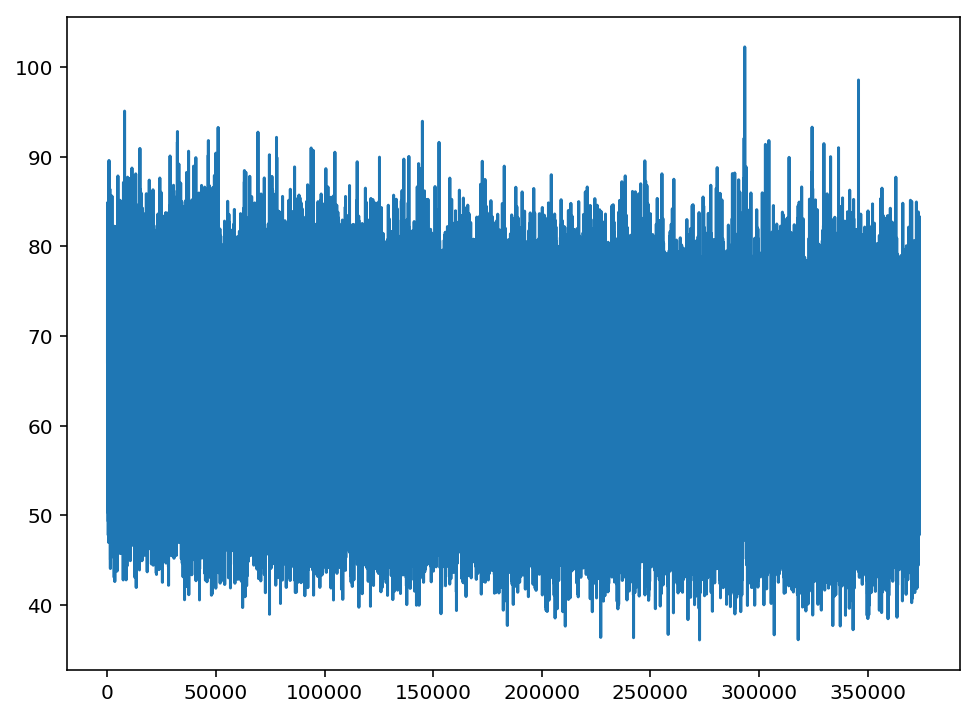

In [100]:
plt.figure(figsize=(8, 6))
plt.plot(g_losses_110 + g_losses_130 + g_losses_150)
plt.show()

In [101]:
len(g_losses_110), len(g_losses_130), len(g_losses_150)

(186880, 93440, 93440)

In [102]:
sum(g_losses_110) / len(g_losses_110)

tensor(61.4784, device='cuda:0')

In [103]:
sum(g_losses_130) / len(g_losses_130)

tensor(60.2629, device='cuda:0')

In [104]:
sum(g_losses_150) / len(g_losses_150)

tensor(59.8262, device='cuda:0')